# Fitbit Hackathon
> Authors: [Dawn Graham](https://dawngraham.github.io/) and [Jacopo Cecchi](https://github.com/jjjjjjjjjj12)

## Description

Our feature does the following:
- Allows the user to set a daily step goal.
- Updates the user on how many more steps they need to meet their goal OR how many steps over their goal they have taken.
- Tells the user if they met their goal multiple consecutive days.
- Suggests the user update their goal if they have met it at least 5 days in a row.

### Future Developments
- The `get_update` function is built to allow a specific `feature` (such as steps, miles, or calories) to be defined. Currently, only steps are accounted for, but this could be expanded.
- With live data synched to an account, `user_id` and `today` would not necessarily need to be  defined in the `get_update` function.

## Set Up Area

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read in datasets
activity = pd.read_csv('./data/dailyActivity_merged.csv')

# Change date column to datetime and set to index
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
activity.set_index(activity['ActivityDate'], inplace=True)

activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ActivityDate,,,,,,,,,,,,,,,
2016-04-12,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
2016-04-13,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2016-04-14,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
2016-04-15,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
2016-04-16,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Feature Functions

In [3]:
# Get user input for step goal
def set_goal():
    while True:
        try:
            goal = int(input('How many steps do you want to take each day? '))
            print(f'Your goal is to take {format(goal, ",d")} steps each day.')
            return goal
        except ValueError:
            print('\nPlease enter a number only.')

In [4]:
# We may want to force all column names to be lowercase and same for inputs!
def get_update(user_id, today, feature, goal):
    
    # Create filters
    filtered = activity[activity.Id == user_id] #filter by user id
    today_row = filtered.loc[today]             #filter by date
    today_score = today_row.loc[feature]        #assign score for selected feature by day
    
    # Give today's update
    if goal == today_score:
        print(f'Congrats! You met your goal of {format(goal, ",d")} steps today!')
        print('')
    elif goal < today_score:
        print(f"Congrats! You have taken {format(today_score, ',d')} steps today.")
        print(f"That's {format(today_score - goal, ',d')} steps more than your daily goal of {format(goal, ',d')} steps!")
        print('')
    else:
        print(f'You need {format(goal - today_score, ",d")} more steps to meet your daily goal of {format(goal, ",d")} steps. You can do it!')
        print('')
              
    # Verify whether the goal objective has been met in the previous days continuously
    count = 0
    for i in range(1, len(filtered)):
        try:
            back_date = pd.to_datetime(today) - dt.timedelta(days=i) #go i days back from today and assign to back_date
            row_in_past = filtered.loc[back_date] #look for row X day before
            past_score = row_in_past.loc[feature] #look for score X day before
            if past_score >= goal:                
                count += 1
            else:
                break
        except:
            pass
    
    if count > 1:
        print(f'You have met your goal {count} days in a row. Keep the streak going!')
        print('')
    
    # Suggest higher goal if goal met multiple consecutive days
    if count >= 5:
        print(f"Let's update your goal.")
        print(f'A 1% increase would only be {format(int(goal * .01), ",d")} more steps, for a total of {format(int(goal * 1.01), ",d")} steps each day.')
        while True:
            try:
                goal = int(input(f'What would you like your new goal to be? '))
                print('')
                print(f'Your new daily goal is {format(goal, ",d")} steps.')
                return goal
            except ValueError:
                print('\nPlease enter a number only.')
    else:
        return goal

In [5]:
def show_chart(user_id, goal):
    plt.figure(figsize=(14,4))
    plt.plot(activity[activity['Id'] == 1503960366]['TotalSteps'], color='teal', lw=3, label='Daily Steps')
    plt.axhline(y=goal, color='yellowgreen', linestyle='-', lw=3, alpha=0.8, label='Current Step Goal')
    plt.legend(fontsize=14)
    plt.tight_layout();

## Run Example

**Set initial goal**

In [6]:
goal = set_goal()

How many steps do you want to take each day? 10000
Your goal is to take 10,000 steps each day.


**Get update on goal**

In [7]:
goal = get_update(1503960366, '2016-04-29', 'TotalSteps', goal)

Congrats! You have taken 11,181 steps today.
That's 1,181 steps more than your daily goal of 10,000 steps!

You have met your goal 7 days in a row. Keep the streak going!

Let's update your goal.
A 1% increase would only be 100 more steps, for a total of 10,100 steps each day.
What would you like your new goal to be? 11000

Your new daily goal is 11,000 steps.


**Get visualization of daily steps and current goal**

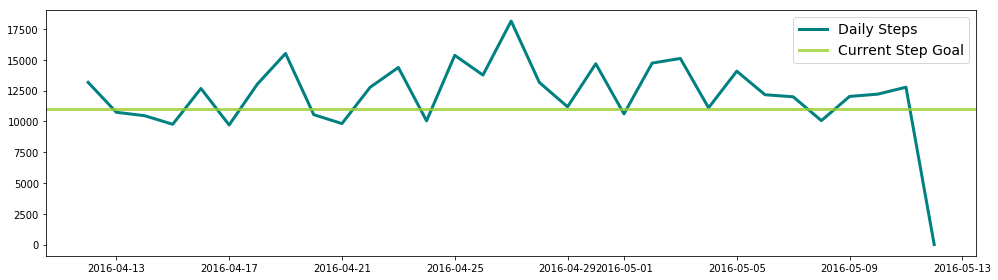

In [8]:
show_chart(1503960366, goal)